<a id='the_top'></a>
# Arquivo de Funcoes Uteis
[Time Functions](#Time-Functions)

[Analysis](#analysis)

[Help](#help)

In [1]:
import pandas as pd
import time

[Go to top of file](#Arquivo-de-Funcoes-Uteis)
<a id='gt_time'> </a>
## Time Functions

In [58]:
import time
import chime
chime.theme(chime.themes()[2])
def tictoc(func):
    def wrapper(*args, **kwargs):
        t1 = time.perf_counter()
        func(*args, **kwargs)
        print(f'{func.__name__} : {round(time.perf_counter() - t1,1)} seconds')
        chime.success()
    return wrapper

@tictoc
def teste_time():
    time.sleep(3)
    return

In [59]:
teste_time()

teste_time : 3.0 seconds


In [ ]:
import time
import chime
chime.theme(chime.themes()[2])
def timeit():
    return time.perf_counter()
def delta_time(start, end):
    chime.success()
    time.sleep(0.6)
    print(f'Tempo de execucao Start - End: {round((end - start)/60,2)} Minutos')
    return 

inicio = timeit()
time.sleep(5)
fim = timeit()
delta_time(inicio, fim)

Tempo de execucao Start - End: 0.08 Minutos


[Go to top of file](#Help)
<a id='gt_analysis'> </a>
## Analysis

In [13]:
def agrup(group):
    return pd.Series({
        'a':agrup['Pontos'].agg(['sum'])
    })
base.groupby(by=['Escola']).apply(agrup)

TypeError: 'function' object is not subscriptable

In [3]:
#Groupby
import pandas as pd
def agrup(group, dic):
    # mean(): Compute mean of groups
    # sum(): Compute sum of group values
    # size(): Compute group sizes
    # count(): Compute count of group
    # std(): Standard deviation of groups
    # var(): Compute variance of groups
    # sem(): Standard error of the mean of groups
    # min(): Compute min of group values
    # max(): Compute max of group values

    # Call: dic = {'Nome_agrupamento': ('Coluna_Agrupada', 'funcao')}
    # Agrupamento = dataframe.groupby(by=['Coluna_Chave']).apply(agrup,dic)
    agrupado = {}
    for key in dic:
        agrupado[key] = group[dic[key][0]].agg(dic[key][1])
    return pd.Series(agrupado)
 
base = pd.DataFrame({'Aluno':['p1','p2','p3','p4','p5'],
                     'Escola': ['e1','e1','e2','e2','e3'],
                     'Pontos':[2,10,50,100,99]})
dic = {'Count': ('Pontos', 'size'),
        'Media': ('Pontos', 'mean'),
        'Soma': ('Pontos','sum'),
        'Maximo':('Pontos','max'),
        'Desvio':('Pontos','std')}
agrupamento = base.groupby(by=['Escola']).apply(agrup,dic).reset_index()

In [ ]:
agrupamento

,Escola,Count,Media,Soma,Maximo,Desvio
0,e1,2.0,6.0,12.0,10.0,5.656854
1,e2,2.0,75.0,150.0,100.0,35.355339
2,e3,1.0,99.0,99.0,99.0,NaN


[Go to top of file](#Arquivo-de-Funcoes-Uteis)
## Help

In [2]:
#Get files from folder
import os
import sys
path = './'
os.listdir(path)

['.git',
 'conhecimento.ipynb',
 'data_viz_python.ipynb',
 'files',
 'first colab.ipynb',
 'funcoes.py',
 'funcoes_kenzo.py',
 'ML_testing.ipynb',
 'py_test.ipynb',
 'README.md',
 'try_import.py',
 '__pycache__']

In [ ]:
#Make sound when finish
import chime
import time
chime.theme(chime.themes()[2])
def sucess():
    for x in range(0,3):
        chime.success()
        time.sleep(0.6)
    return
sucess()

In [ ]:
#Rankeamento
import pandas as pd
df = pd.DataFrame({'Coluna1':['a','b','c','d','e','a','b','c','e','f','f','a','c','c','d','a','b'], 'Coluna2':[1,2,3,1,2,4,5,10,5,6,5,1,10,1,10,9,7]})
df['rank'] = df.groupby(by=['Coluna1'])['Coluna2'].rank(ascending=False, method='max')
#df.sort_values(by=['Coluna1', 'rank'], ascending=[True, True],inplace=True)

In [3]:
#Check Size of Variables
def sizeof(num, suffix='B'):
    for unit in ['', 'Ki', 'Mi', 'Gi', 'Ti', 'Pi', 'Ei', 'Zi']:
        if abs(num)<1024:
            return '%3.1f %s%s' % (num, unit, suffix)
        num = num/1024
    return '%.1f %s%s' % (num, 'Yi', suffix)
    
for name, size in sorted(((name, sys.getsizeof(value)) for name, value in locals().items()), key=lambda x: -x[1])[:10]:
    print('{:>10}: {:>8}'.format(name, sizeof(size)))

       _i3:  493.0 B
       _oh:  232.0 B
       Out:  232.0 B
         _:  184.0 B
        _2:  184.0 B
      open:  144.0 B
    sizeof:  144.0 B
        _i:  121.0 B
       _i2:  121.0 B
       _ih:  120.0 B


# Data Viz

area1


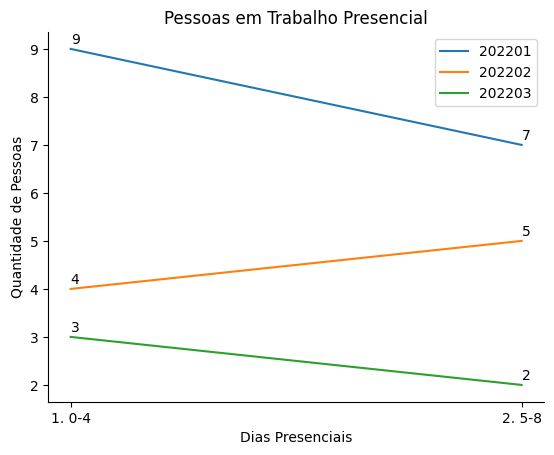

area2


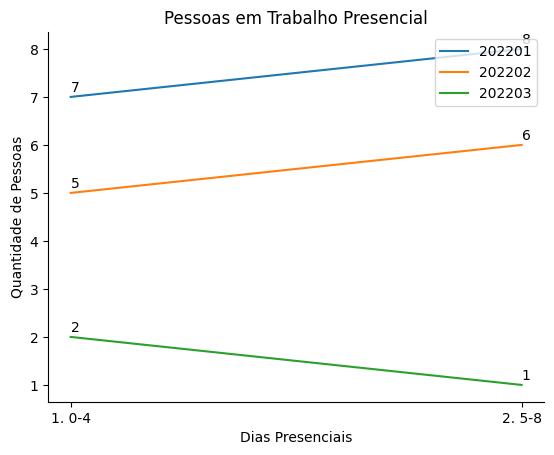

tipo,anomes,area,1. 0-4,2. 5-8
0,202201,area1,9,7
1,202201,area2,7,8
2,202202,area1,4,5
3,202202,area2,5,6
4,202203,area1,3,2
5,202203,area2,2,1


In [5]:
from copy import deepcopy
from matplotlib import pyplot as plt
teste = pd.DataFrame({
    'anomes':['202201','202201','202201','202201','202202','202202','202202','202202','202203','202203','202203','202203'],
    'area':['area1','area1','area2','area2','area1','area1','area2','area2','area1','area1','area2','area2'],
    'tipo':['1. 0-4','2. 5-8','1. 0-4','2. 5-8','1. 0-4','2. 5-8','1. 0-4','2. 5-8','1. 0-4','2. 5-8','1. 0-4','2. 5-8'],
    'qtd':[9,7,7,8,4,5,5,6,3,2,2,1]})
teste = teste.pivot(index=['anomes','area'],columns=['tipo'])['qtd'].reset_index()
for area_ in teste.area.unique():
    print(area_)
    graph = teste[teste['area'] == area_]
    fig, ax = plt.subplots()
    for anomes_ in graph.anomes.unique():
        colunas_dados = [x for x in graph.columns if '-' in x]
        X = deepcopy(colunas_dados)
        Y = graph[graph['anomes'] == anomes_][colunas_dados].values[0]
        plt.plot(X, Y, label = anomes_)
        for a,b in zip(X, Y): 
            plt.text(a, b+0.1, str(b))
    plt.title('Pessoas em Trabalho Presencial')
    plt.xlabel('Dias Presenciais')
    plt.ylabel('Quantidade de Pessoas')
    plt.legend(loc="upper right")
    ax.spines['top'].set_visible(False) #top, bottom, right, left
    ax.spines['right'].set_visible(False)
    
    plt.show()
teste

0.001

[Go to top of file](#Arquivo-de-Funcoes-Uteis)
# Memoize


In [56]:
import functools
import time
cache = {}
def fibonacci(n,cache=cache):
    if n in cache:
        return cache[n]
    else:
        if n < 2:
            cache[n] = n
            return n
        else:
            value = fibonacci(n-1) + fibonacci(n-2)
            cache[n] = value 
            return value
n = 2001
ini = time.perf_counter()
print(f'Fibonacci {n}: {fibonacci(n)/10**400:.2E}')
print(f'{time.perf_counter()-ini:.2f} Segundos')
print(f'Len: {len(cache)}')

Fibonacci 2001: 6.84E+17
0.00 Segundos
Len: 2002


In [2]:
import functools
@functools.lru_cache(maxsize=None)
def fibonacci(n):
    if n < 2:
        return n
    else:
        return fibonacci(n-1) + fibonacci(n-2)
fibonacci(1500)

RecursionError: maximum recursion depth exceeded

In [5]:
from functools import wraps
import sys
sys.setrecursionlimit(10_000)
def memoize(func):
    cache = {}
    @wraps(func)
    def wrapper(*args,**kwargs):
        key = str(args) + str(kwargs)
        if key not in cache:
            cache[key] = func(*args,**kwargs)
        return cache[key]
    return wrapper

@memoize
def fibonacci(n):
    if n < 2:
        return n
    else:
        return fibonacci(n-1) + fibonacci(n-2)
    
fibonacci(1000)

: 

In [7]:
import time
import sys
import chime
from functools import lru_cache, cache
chime.theme(chime.themes()[2])
#sys.setrecursionlimit(2000)
@lru_cache(maxsize=1000)
def fibonacci(n):
    if n in [1,2]:
        return n-1
    else:
        return fibonacci(n-1) + fibonacci(n-2)
t1 = time.perf_counter()
fibonacci(950)


954521236278588975816913938063968779260873747465795884949378312109678175647627296076764558944928968059888214242449760455065605370660692836050793012165747204003730731419160152751883337579046951711449

# New

In [ ]:
def create_folder(path):
    try:
        os.mkdir(path)
    except Exception as e:
        if str(e).startswith(('[WinError 183]','[Errno 17]')):
            pass
        else:
            print(e)

# Speed

In [44]:
import numpy as np
import chime
from functools import wraps
import time
chime.theme(chime.themes()[2])
#chime.success()

def sound(func):
    @wraps(func)
    def wrapper(*args, **kwargs):
        val = func(*args, **kwargs)
        chime.success()
        return val
    return wrapper

def tictoc(func):
    @wraps(func)
    def wrapper(*args, **kwargs):
        ini = time.perf_counter()
        func(*args, **kwargs)
        print(f'{func.__name__}: Tempo de execução: {(time.perf_counter()-ini):.2f}' )
    return wrapper

@tictoc  
@sound
def sum_while(n):
    i = 0
    sum = 0
    while i < n:
        sum = sum + i
        i = i+1   
    return sum

@tictoc  
@sound
def sum_for(n):
    sum = 0
    for i in range(n):
        sum = sum + i
    return sum

@tictoc  
@sound
def sum_range(n):
    return sum(range(n))

@tictoc  
@sound
def sum_np(n):
    return np.sum(np.arange(n)) #create array of size n.

@tictoc  
@sound
def sum_math(n):
    return (n*(n-1))//2 #create array of size n.


n_value = 100_000_000
a = sum_while(n_value)
b = sum_for(n_value)
c = sum_range(n_value)
d = sum_np(n_value)
e = sum_math(n_value)

sum_while: Tempo de execução: 4.53
sum_for: Tempo de execução: 2.82
sum_range: Tempo de execução: 2.09
sum_np: Tempo de execução: 0.10
sum_math: Tempo de execução: 0.00


In [48]:
print(d)

None
